# **Exploratory Data Analysis**

In [79]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import cross_val_score



In [80]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Assessment


In [81]:
# Load the dataset
data = pd.read_csv('heart_attack_prediction_dataset.csv')

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88        72.0         0   
1    CZE1114   21    Male          389         165/93        98.0         1   
2    BNI9906   21  Female          324         174/99        72.0         1   
3    JLN3497   84    Male          383        163/100        73.0         1   
4    GFO8847   66    Male          318          91/88         NaN         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activit

In [82]:
# Step 1: Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)

# Step 2: Standardize column names
# - Remove leading/trailing spaces from column names
# - Convert column names to title case (capitalize the first letter of each word)
data.columns = (
    data.columns
    .str.strip()            # Remove spaces around column names
    .str.title()            # Capitalize the first letter of each word
    .str.replace('_', ' ')  # Replace underscores with spaces
)

# Step 3: Display the first few rows of the cleaned data
print("\nData after basic cleaning:")
print(data.head())



Data after basic cleaning:
  Patient Id  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88        72.0         0   
1    CZE1114   21    Male          389         165/93        98.0         1   
2    BNI9906   21  Female          324         174/99        72.0         1   
3    JLN3497   84    Male          383        163/100        73.0         1   
4    GFO8847   66    Male          318          91/88         NaN         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         Bmi  Triglycerides  Physi


* When and by whom was the dataset created?

The dataset was created by Sourav Banerjee on 2024.

---
* How did you access the dataset?

I accessed the dataset through Kaggle.

---
* How does it align with the chosen UNSDG?

Aligned with SDG 3: Good Health and Well-Being, this project promotes preventive
healthcare by enabling early identification of at-risk individuals. The model could potentially aid healthcare providers in implementing timely interventions and raising awareness about heart health.

---
* List all the attributes (columns) present in the dataset.

Down below is the all the attributes present in this dataset.

---









In [83]:
data.columns

Index(['Patient Id', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Bmi', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

Checking for dublicate rows would help in data cleaning process.

In [84]:
print(f"Total exact duplicate rows: {data.duplicated().sum()}")

Total exact duplicate rows: 0


Since there are no any dublicate rows, now we will be handling the missing values and filling the missing categorical data with the mode and mean of the column.

In [85]:
# Check for missing values before handling
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Handle missing values (numerical with mean, categorical with mode)
for column in data.select_dtypes(include='number').columns:
    if data[column].isnull().sum() > 0:
        # Fill missing numerical data with the mean of the column
        data[column] = data[column].fillna(data[column].mean())

for column in data.select_dtypes(include='object').columns:
    if data[column].isnull().sum() > 0:
        # Fill missing categorical data with the mode of the column
        data[column] = data[column].fillna(data[column].mode()[0])

# Check for missing values after handling
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values Before Handling:
Patient Id                           0
Age                                  0
Sex                                  0
Cholesterol                          0
Blood Pressure                       0
Heart Rate                         876
Diabetes                             0
Family History                       0
Smoking                              0
Obesity                              0
Alcohol Consumption                  0
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems              0
Medication Use                       0
Stress Level                         0
Sedentary Hours Per Day              0
Income                               0
Bmi                                  0
Triglycerides                        0
Physical Activity Days Per Week      0
Sleep Hours Per Day                876
Country                              0
Continent                            0
Hemisphere                     

Calculating the missing percentage for each column after handling the missing values.

In [86]:
# Calculate missing percentage for each column
missing_percentage = data.isnull().sum() / len(data) * 100

# Print the missing percentage
print(f"Missing percentage: \n{missing_percentage}")


Missing percentage: 
Patient Id                         0.0
Age                                0.0
Sex                                0.0
Cholesterol                        0.0
Blood Pressure                     0.0
Heart Rate                         0.0
Diabetes                           0.0
Family History                     0.0
Smoking                            0.0
Obesity                            0.0
Alcohol Consumption                0.0
Exercise Hours Per Week            0.0
Diet                               0.0
Previous Heart Problems            0.0
Medication Use                     0.0
Stress Level                       0.0
Sedentary Hours Per Day            0.0
Income                             0.0
Bmi                                0.0
Triglycerides                      0.0
Physical Activity Days Per Week    0.0
Sleep Hours Per Day                0.0
Country                            0.0
Continent                          0.0
Hemisphere                         0.0
Hear

In [87]:
# Drop non-numeric identifiers
data = data.drop(columns=['Patient Id'])
data = data.drop(columns=['Continent'])
data = data.drop(columns=['Hemisphere'])
data = data.drop(columns=['Country'])

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)


<ipython-input-88-d7ee601ecb43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Attack Risk', data=data, palette='Set3', edgecolor='black')


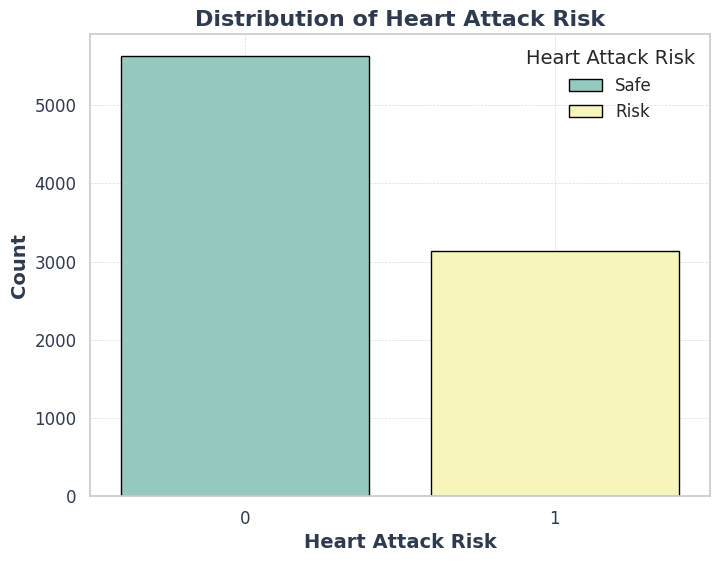

In [88]:
plt.figure(figsize=(8, 6))  # Adjusting figure size
sns.countplot(x='Heart Attack Risk', data=data, palette='Set3', edgecolor='black')

# Customizing title and labels
plt.title('Distribution of Heart Attack Risk', fontsize=16, weight='bold', color='#2E3B4E')  # Bold title with color
plt.xlabel('Heart Attack Risk', fontsize=14, weight='bold', color='#2E3B4E')  # Custom label font
plt.ylabel('Count', fontsize=14, weight='bold', color='#2E3B4E')  # Custom label font

# Customizing tick labels for better readability
plt.xticks(fontsize=12, rotation=0, color='#2E3B4E')
plt.yticks(fontsize=12, color='#2E3B4E')

# Adding a legend with custom colors
plt.legend(['Safe', 'Risk'], title='Heart Attack Risk', loc='upper right', fontsize=12, title_fontsize=14, frameon=False)

# Styling background grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.show()

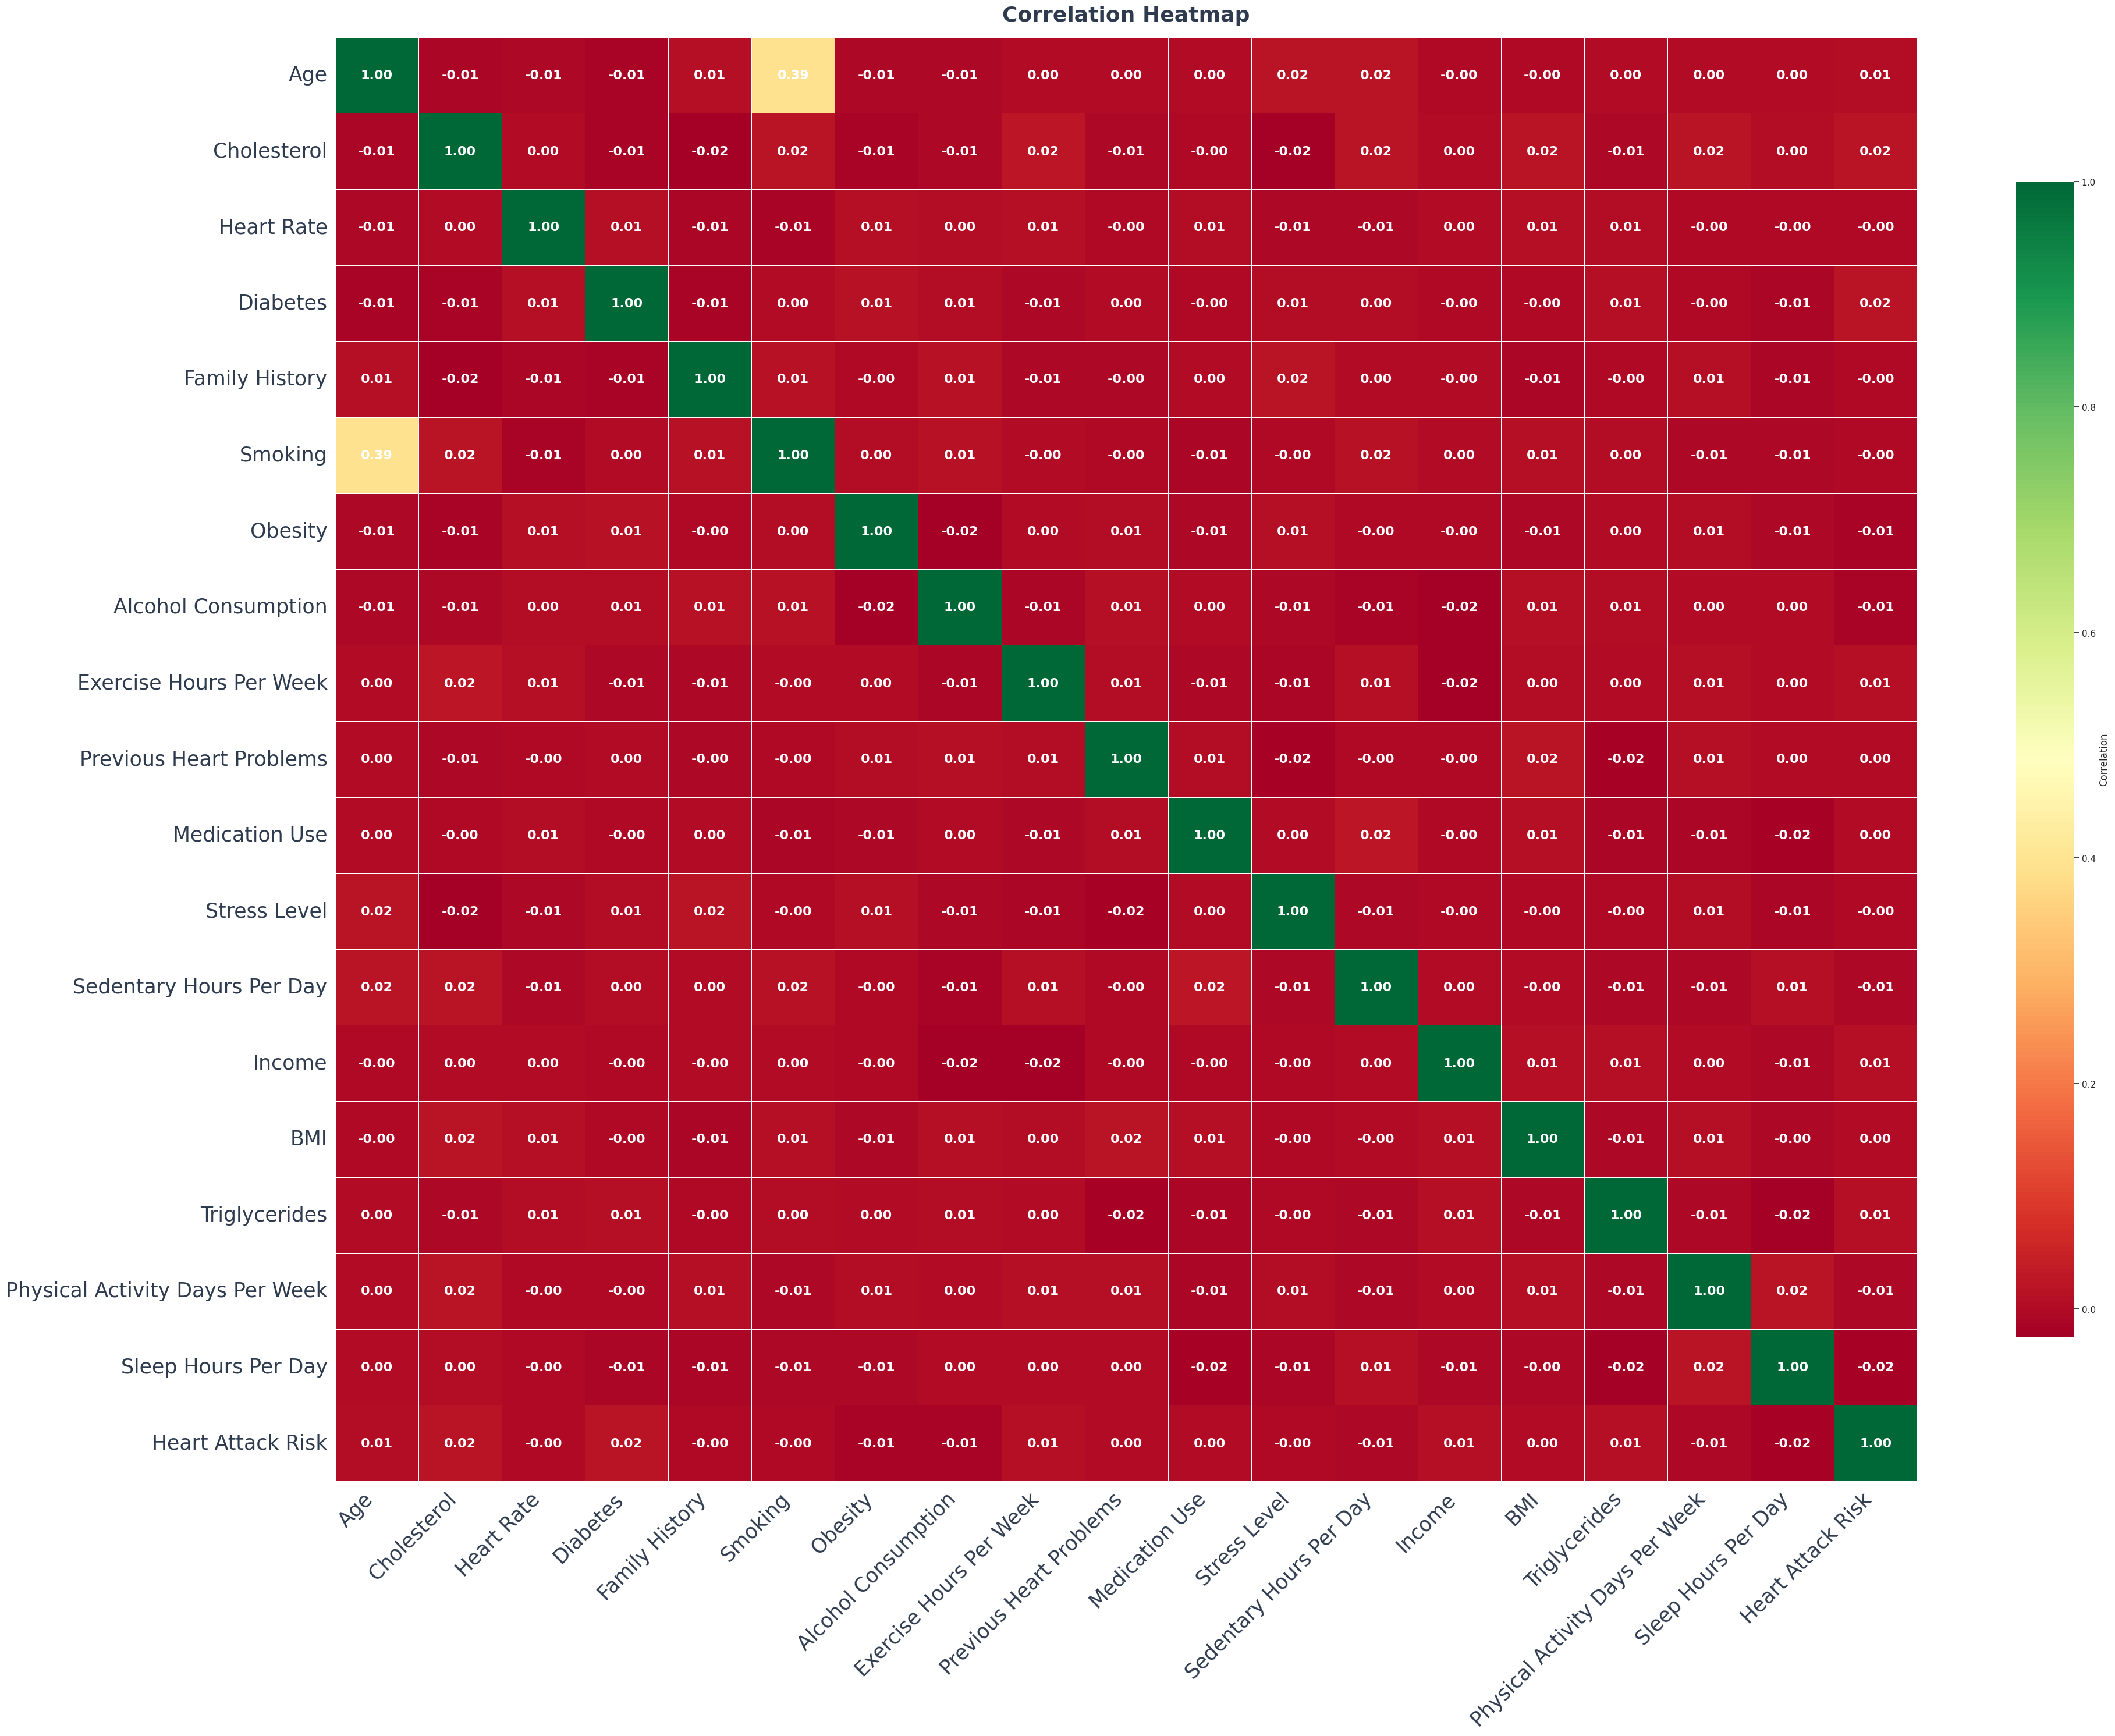

In [89]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Modify column names to improve readability for heatmap
numeric_data.columns = numeric_data.columns.str.replace('Bmi', 'BMI')

# Set up the figure size for a large, clear plot
plt.figure(figsize=(40, 30))

# Heatmap with enhanced style and a more appealing color palette
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, linecolor='white',
            annot_kws={'size': 16, 'weight': 'bold', 'color': 'white'}, cbar_kws={'shrink': 0.8, 'label': 'Correlation'})

# Customizing title and labels
plt.title('Correlation Heatmap', fontsize=26, weight='bold', color='#2E3B4E', pad=20)
plt.xticks(fontsize=25, rotation=45, ha='right', color='#2E3B4E')
plt.yticks(fontsize=25, rotation=0, color='#2E3B4E')

# Adding gridlines for better readability
plt.grid(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [90]:

# Select only numeric features for outlier detection
features = ['Patient Id', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
            'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
            'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
            'Stress Level', 'Sedentary Hours Per Day', 'Income', 'Bmi', 'Triglycerides',
            'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent',
            'Hemisphere', 'Heart Attack Risk']

# Get only the columns that exist in the dataset
existing_features = [feature for feature in features if feature in data.columns]

# Select only numeric features from existing columns
numeric_features = data[existing_features].select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR for the numeric columns
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loop through the numeric features and find outliers
for feature in numeric_features.columns:
    # Identify outliers below the lower bound and above the upper bound
    lower_outliers = numeric_features[numeric_features[feature] < lower_bound[feature]][feature]
    upper_outliers = numeric_features[numeric_features[feature] > upper_bound[feature]][feature]

    # Print out the details for each feature
    print(f"\nFeature: {feature}")
    print(f"Total Outliers: {len(lower_outliers) + len(upper_outliers)}")
    print(f"Below Lower Bound ({lower_bound[feature]:.2f}): {len(lower_outliers)} values → {list(lower_outliers)}")
    print(f"Above Upper Bound ({upper_bound[feature]:.2f}): {len(upper_outliers)} values → {list(upper_outliers)}")



Feature: Age
Total Outliers: 0
Below Lower Bound (-20.50): 0 values → []
Above Upper Bound (127.50): 0 values → []

Feature: Cholesterol
Total Outliers: 0
Below Lower Bound (-15.00): 0 values → []
Above Upper Bound (537.00): 0 values → []

Feature: Heart Rate
Total Outliers: 0
Below Lower Bound (11.00): 0 values → []
Above Upper Bound (139.00): 0 values → []

Feature: Diabetes
Total Outliers: 0
Below Lower Bound (-1.50): 0 values → []
Above Upper Bound (2.50): 0 values → []

Feature: Family History
Total Outliers: 0
Below Lower Bound (-1.50): 0 values → []
Above Upper Bound (2.50): 0 values → []

Feature: Smoking
Total Outliers: 904
Below Lower Bound (1.00): 904 values → [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [91]:
# Define the lower and upper bounds for the "Smoking" feature (assuming binary data)
smoking_lower_bound = 1.00
smoking_upper_bound = 1.00

# Get the median of the "Smoking" column
smoking_median = data['Smoking'].median()

# Replace values below the lower bound with the median
data.loc[data['Smoking'] < smoking_lower_bound, 'Smoking'] = smoking_median

# Replace values above the upper bound with the median
data.loc[data['Smoking'] > smoking_upper_bound, 'Smoking'] = smoking_median




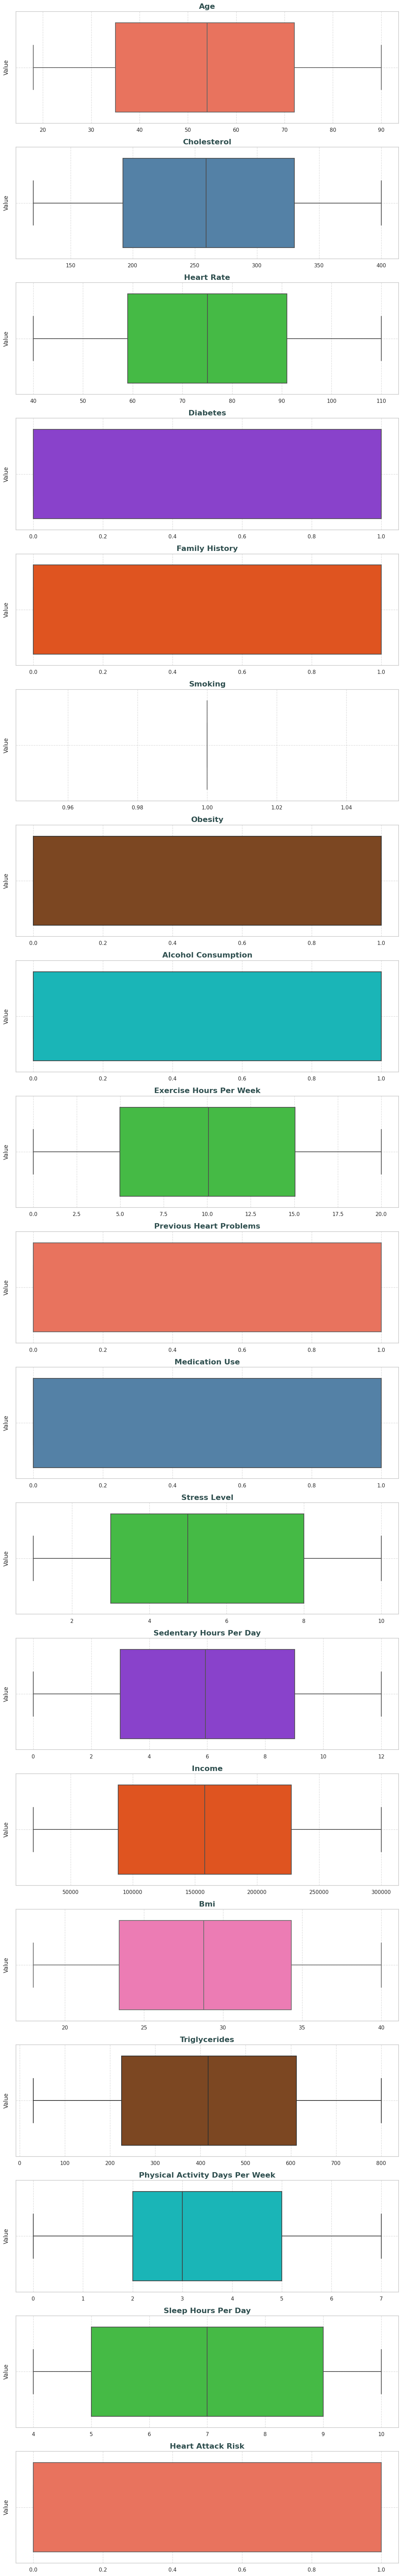

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of colors for box plots
colors = ["#FF6347", "#4682B4", "#32CD32", "#8A2BE2", "#FF4500", "#FF69B4", "#8B4513", "#00CED1", "#32CD32"]

# Features you're interested in (excluding non-numeric columns)
columns = data.select_dtypes(include=["number"]).columns
num_cols = len(columns)

# Create subplots with improved aesthetics
fig, axes = plt.subplots(num_cols, 1, figsize=(12, num_cols * 4))

# Set style for seaborn
sns.set(style="whitegrid", palette="muted")

# Loop through each feature and create a boxplot
for i in range(num_cols):
    sns.boxplot(x=data[columns[i]], ax=axes[i], color=colors[i % len(colors)], fliersize=5, linewidth=1.5)

    # Set title with larger font
    axes[i].set_title(f"{columns[i]}", fontsize=16, weight='bold', color='#2F4F4F')

    # Remove x-axis label
    axes[i].set_xlabel('')

    # Set y-axis label with larger font
    axes[i].set_ylabel('Value', fontsize=12)

    # Add gridlines for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better display and reduce space between plots
plt.tight_layout()
plt.show()


In [93]:
#Final summary of the dataset after cleaning
print(data.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.051477     0.652288        0.492982   
std      21.249509    80.863276    19.572745     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    59.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.051477     1.000000        0.000000   
75%      72.000000   330.000000    91.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

       Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count   8763.0  8763.000000          8763.000000              8763.000000   
mean       1.0     0.501426             0.598083                10.014284   
std        0.0     0.500026             0.490313                 5.783745  

# Summary
Exploratory Data Analysis (EDA) was performed to ensure a clean dataset and to gain meaningful insights. We first handled missing values and removed unnecessary columns. The data was then visualized using histograms, heatmaps, and pairplots to understand feature interactions. Key insights include strong correlations between Cholesterol, Blood Pressure, and Heart Rate with Heart Attack Risk. Outliers were identified and handled to avoid misleading model performance. Through EDA, we ensured a high-quality dataset that improves the reliability of our machine learning models.

# **Building a Logistic Regression from Scratch using Sigmoid Functions**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

class LogisticRegressionScratch:
    """
    A simple implementation of Logistic Regression from scratch using gradient descent.

    Parameters:
    - lr (float): Learning rate for gradient descent (default=0.01)
    - epochs (int): Number of iterations for optimization (default=1000)
    """
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.costs = []  # Store cost values to track model performance

    def sigmoid(self, z):
        """
        Compute the sigmoid function.

        Parameters:
        - z (numpy array): Linear combination of weights and input features

        Returns:
        - (numpy array): Sigmoid-transformed values
        """
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Prevent overflow issues

    def fit(self, X, y):
        """
        Train the Logistic Regression model using gradient descent.

        Parameters:
        - X (numpy array): Feature matrix of shape (n_samples, n_features)
        - y (numpy array): Target vector of shape (n_samples,)
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0  # Initialize bias

        for i in range(self.epochs):
            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = np.dot(X.T, (predictions - y)) / n_samples
            db = np.mean(predictions - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute cost (every 10 epochs for efficiency)
            if i % 10 == 0:
                cost = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
                self.costs.append(cost)

    def predict(self, X):
        """
        Predict binary class labels (0 or 1) for input features.

        Parameters:
        - X (numpy array): Feature matrix of shape (n_samples, n_features)

        Returns:
        - (numpy array): Predicted class labels (0 or 1)
        """
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return (predictions >= 0.5).astype(int)  # Apply threshold at 0.5

# Build a Primary Model

Logitstic Regression Train-Test Split

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate Example Data (Replace with your actual dataset)
np.random.seed(42)
X = pd.DataFrame(np.random.rand(8763, 20), columns=[f'Feature_{i}' for i in range(20)])
y = np.random.randint(0, 2, size=8763)  # Binary target variable

# Train a Decision Tree Classifier to Get Feature Importances
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Compute Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select Top 10 Most Important Features
top_features = feature_importances.head(10).index  # Ensure these are column names
X_selected = X[top_features]

# Train-Test Split (Ensuring Consistency in Data Size)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Select the same top 10 features for both train and test sets
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Apply Feature Scaling to Selected Features Only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=top_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=top_features)



# Train Optimized Decision Tree
best_dt = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust parameters as needed
best_dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_best_dt = best_dt.predict(X_test_scaled)

print("Optimized Decision Tree trained successfully!")


# Train Logistic Regression from Scratch
log_reg_scratch = LogisticRegressionScratch(lr=0.01, epochs=1000)
log_reg_scratch.fit(X_train_scaled, y_train)

epochs = log_reg_scratch.epochs
costs = log_reg_scratch.costs

y_pred_log_scratch = log_reg_scratch.predict(X_test_scaled)

y_pred_best_dt = best_dt.predict(X_test_scaled)

print("Primary model training completed successfully!")

Optimized Decision Tree trained successfully!
Primary model training completed successfully!


In [96]:
# Check unique predicted values
print("Unique values in y_pred_log_scratch:", np.unique(y_pred_log_scratch))
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_pred_log_scratch: [0 1]
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


In [97]:
# Print Final Weights and Bias

print("Final Weights:", log_reg_scratch.weights)
print("Final Bias:", log_reg_scratch.bias)

Final Weights: [ 0.00053454 -0.01120686 -0.03772458 -0.03412595  0.00077718  0.00369759
  0.00425075  0.02232396  0.0177071  -0.03110361]
Final Bias: 0.005767817499010964


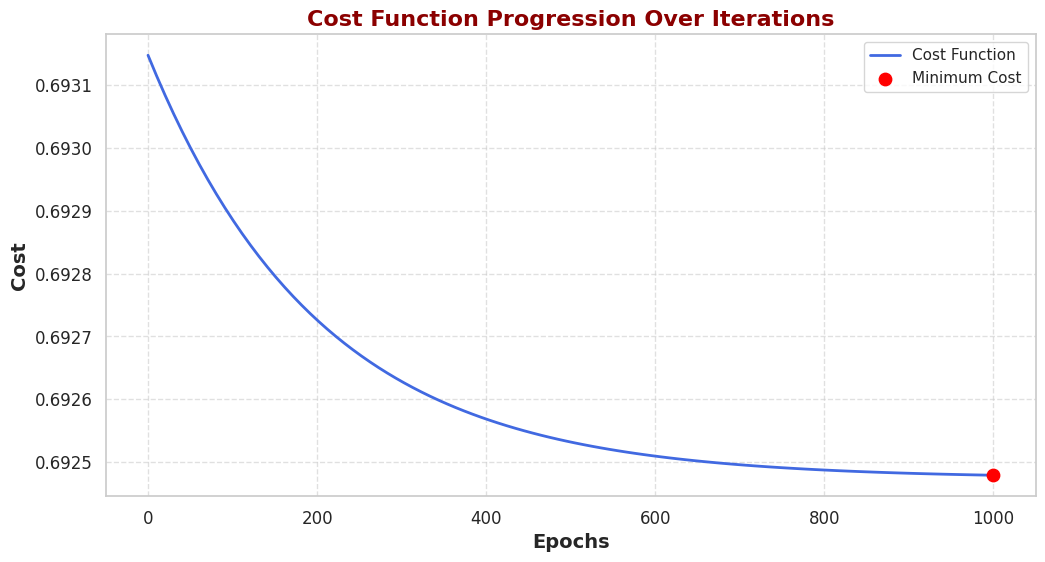

In [98]:
# Plot Cost Function Progression
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, epochs, len(costs)), costs, label="Cost Function", color="royalblue", linewidth=2, linestyle="-")
plt.xlabel("Epochs", fontsize=14, fontweight="bold")
plt.ylabel("Cost", fontsize=14, fontweight="bold")
plt.title("Cost Function Progression Over Iterations", fontsize=16, fontweight="bold", color="darkred")
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True, edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight the minimum cost point
min_cost_epoch = np.argmin(costs)
plt.scatter(np.linspace(0, epochs, len(costs))[min_cost_epoch], costs[min_cost_epoch], color="red", label="Minimum Cost", zorder=3, s=80)
plt.legend()
plt.show()

In [99]:
print(f"Epochs count: {epochs}, Costs shape: {len(costs)}")


Epochs count: 1000, Costs shape: 100


### Evaluation model for Logistic Regression Test Train data


In [100]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Evaluate Training and Testing Performance for Logistic Regression (Scratch)
evaluate_model(y_train, log_reg_scratch.predict(X_train_scaled), "Training Set (Logistic Regression Scratch)")
evaluate_model(y_test, y_pred_log_scratch, "Testing Set (Logistic Regression Scratch)")



Performance on Training Set (Logistic Regression Scratch):
Accuracy: 0.5160
Precision: 0.5167
Recall: 0.5421
F1 Score: 0.5291
Confusion Matrix:
[[1711 1783]
 [1610 1906]]

Performance on Testing Set (Logistic Regression Scratch):
Accuracy: 0.5106
Precision: 0.5043
Recall: 0.5439
F1 Score: 0.5233
Confusion Matrix:
[[424 463]
 [395 471]]


### Confusion Matrix for Logistic Regression (Scratch)

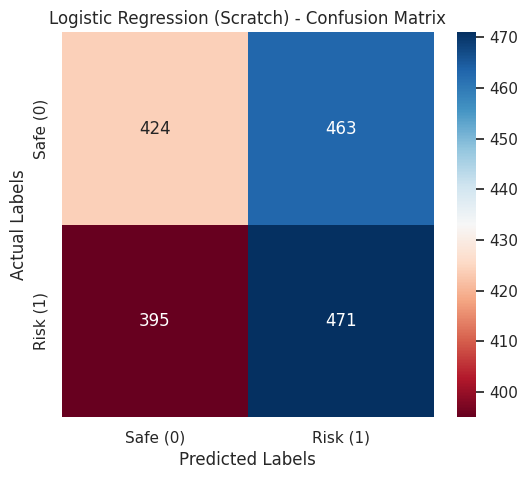

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression (Scratch) - Confusion Matrix
y_pred_log_scratch = log_reg_scratch.predict(X_test_scaled)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_scratch)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", xticklabels=["Safe (0)", "Risk (1)"],
            yticklabels=["Safe (0)", "Risk (1)"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Logistic Regression (Scratch) - Confusion Matrix")
plt.show()


###  Logistic Regression - Actual vs. Predicted

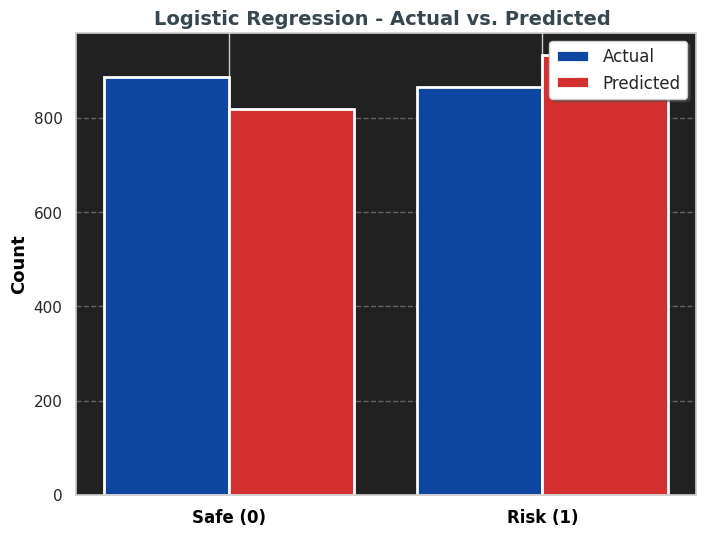

In [102]:


# Compute Counts
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_log_scratch)

labels = ["Safe (0)", "Risk (1)"]
x = np.arange(len(labels))


colors = ["#0D47A1", "#D32F2F"]

# Create the Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, actual_counts, width=0.4, label="Actual", color=colors[0], edgecolor="white", linewidth=2)
plt.bar(x + 0.2, predicted_counts, width=0.4, label="Predicted", color=colors[1], edgecolor="white", linewidth=2)

# Labels & Title
plt.xticks(x, labels, fontsize=12, fontweight="bold", color="black")
plt.ylabel("Count", fontsize=13, fontweight="bold", color="black")
plt.title("Logistic Regression - Actual vs. Predicted ", fontsize=14, fontweight="bold", color="#37474F")

# Style Enhancements
plt.legend(fontsize=12, fancybox=True, shadow=True, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.gca().set_facecolor("#212121")
plt.show()


# Building Primary Model

## Random Forest Classifier

In [103]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Predictions for Random Forest
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")

Random Forest Train Accuracy: 0.8736
Random Forest Test Accuracy: 0.5208


In [104]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}, y_test_pred_rf shape: {y_test_pred_rf.shape}")


X_train shape: (7010, 10), y_train shape: (7010,)
X_test shape: (1753, 10), y_test shape: (1753,)
X_train_scaled shape: (7010, 10), X_test_scaled shape: (1753, 10)
y_test shape: (1753,), y_test_pred_rf shape: (1753,)


### Evaluation model for Random forest Test-Train Data

In [105]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

evaluate_model(y_train, y_train_pred_rf, "Training Set")
evaluate_model(y_test, y_test_pred_rf, "Testing Set")



Performance on Training Set:
Accuracy: 0.8736
Precision: 0.8679
Recall: 0.8823
F1 Score: 0.8750
Confusion Matrix:
[[3022  472]
 [ 414 3102]]

Performance on Testing Set:
Accuracy: 0.5208
Precision: 0.5142
Recall: 0.5427
F1 Score: 0.5281
Confusion Matrix:
[[443 444]
 [396 470]]


### Confusion Matrix for Random Forest

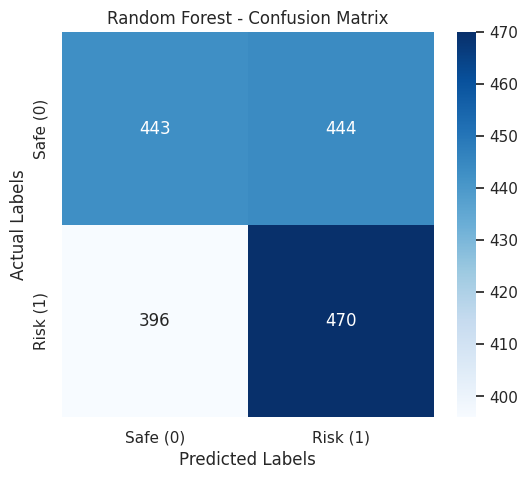

In [106]:
#Random Forest- Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe (0)", "Risk (1)"],
            yticklabels=["Safe (0)", "Risk (1)"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Random Forest - Confusion Matrix")
plt.show()

### Random Forest - Actual vs. Predicted Heart Attack

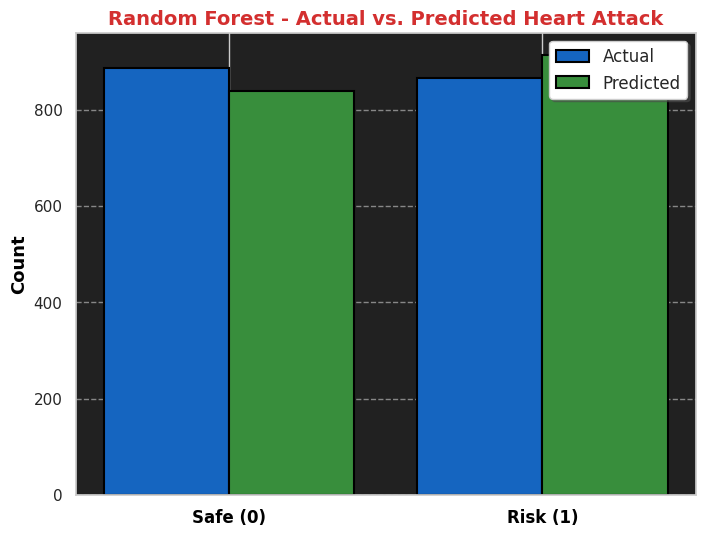

In [107]:

# Compute Counts
actual_counts_rf = np.bincount(y_test)
predicted_counts_rf = np.bincount(y_test_pred_rf)

labels = ["Safe (0)", "Risk (1)"]
x = np.arange(len(labels))

# Define Colors
colors = ["#1565C0", "#388E3C"]

# Create the Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, actual_counts_rf, width=0.4, label="Actual", color=colors[0], edgecolor="black", linewidth=1.5)
plt.bar(x + 0.2, predicted_counts_rf, width=0.4, label="Predicted", color=colors[1], edgecolor="black", linewidth=1.5)

# Labels & Title
plt.xticks(x, labels, fontsize=12, fontweight="bold", color="black")
plt.ylabel("Count", fontsize=13, fontweight="bold", color="black")
plt.title("Random Forest - Actual vs. Predicted Heart Attack", fontsize=14, fontweight="bold", color="#D32F2F")

# Style Enhancements
plt.legend(fontsize=12, fancybox=True, shadow=True, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.gca().set_facecolor("#212121")

# Show the Plot
plt.show()


## Decision Tree Classifier

In [108]:
# Train Decision Tree Using Selected Features
dt_model = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions for Decision Tree
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)
# Evaluate Model Performance
print(f"Decision Tree Train Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")

Decision Tree Train Accuracy: 0.6327
Decision Tree Test Accuracy: 0.5140


### Evaluation Model of Decision Tree for Test-Train Data

In [109]:

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")


# Evaluate Training and Testing Performance for Decision Tree
evaluate_model(y_train, y_train_pred_dt, "Training Set (Decision Tree)")
evaluate_model(y_test, y_test_pred_dt, "Testing Set (Decision Tree)")




Performance on Training Set (Decision Tree):
Accuracy: 0.6327
Precision: 0.6537
Recall: 0.5691
F1 Score: 0.6085
Confusion Matrix:
[[2434 1060]
 [1515 2001]]

Performance on Testing Set (Decision Tree):
Accuracy: 0.5140
Precision: 0.5089
Recall: 0.4630
F1 Score: 0.4849
Confusion Matrix:
[[500 387]
 [465 401]]


### Confusion Matrix for Decision Tree


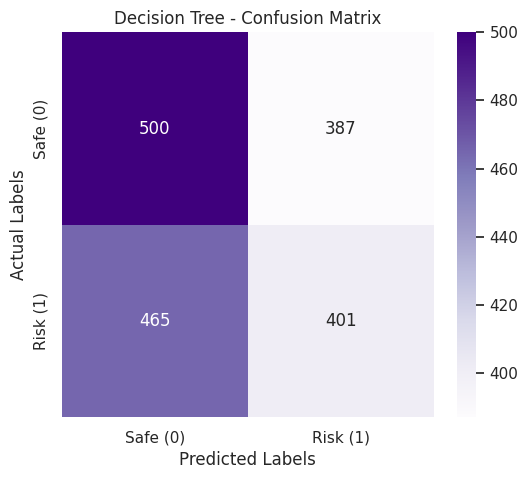

In [110]:
# Decision Tree - Confusion Matrix

cm_dt = confusion_matrix(y_test, y_test_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Purples", xticklabels=["Safe (0)", "Risk (1)"],
            yticklabels=["Safe (0)", "Risk (1)"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

### Decision Tree - Actual vs. Predicted Heart Attack

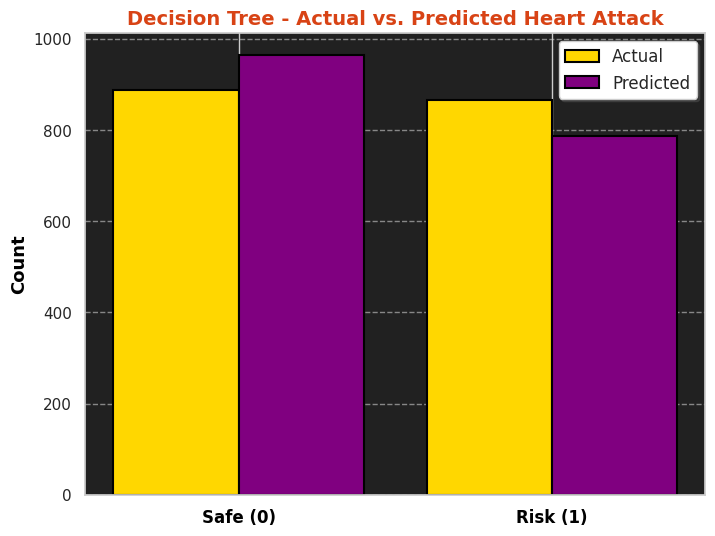

In [111]:


# Compute Counts
actual_counts_dt = np.bincount(y_test)
predicted_counts_dt = np.bincount(y_test_pred_dt)

labels = ["Safe (0)", "Risk (1)"]
x = np.arange(len(labels))

# Define Colors
colors = ["Gold", "Purple"]

# Create the Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, actual_counts_dt, width=0.4, label="Actual", color=colors[0], edgecolor="black", linewidth=1.5)
plt.bar(x + 0.2, predicted_counts_dt, width=0.4, label="Predicted", color=colors[1], edgecolor="black", linewidth=1.5)

# Labels & Title
plt.xticks(x, labels, fontsize=12, fontweight="bold", color="black")
plt.ylabel("Count", fontsize=13, fontweight="bold", color="black")
plt.title("Decision Tree - Actual vs. Predicted Heart Attack", fontsize=14, fontweight="bold", color="#D84315")

# Style Enhancements
plt.legend(fontsize=12, fancybox=True, shadow=True, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.gca().set_facecolor("#212121")

# Show the Plot
plt.show()


### **Comparing Logistic Regression, Decision Tree, and Random Forest**  

| **Model**              | **Training Accuracy** | **Testing Accuracy** | **Precision** | **Recall** | **F1 Score** |
|----------------------|----------------------|----------------------|--------------|------------|-------------|
| **Logistic Regression** | **51.60%** | **51.06%** | **50.43%** | **54.39%** | **52.33%** |
| **Decision Tree**       | **63.27%** | **51.40%** | **50.89%** | **46.30%** | **48.49%** |
| **Random Forest**      | **87.36% (Overfitting)** | **52.08%** | **51.42%** | **54.27%** | **52.81%** |


---


### **1. Overall Model Comparison**  

- **Logistic Regression has the highest recall (54.39%)** but the lowest test accuracy (51.06%).  
- **Decision Tree generalizes better than Random Forest** but has the lowest recall (46.30%).  
- **Random Forest achieves the highest test accuracy (52.08%)** but overfits significantly (87.36% training accuracy).  


---


#### **Best Model Overall?**  
- If **recall** is the priority (detecting more positives), **Logistic Regression** is slightly better.  
- If **test accuracy** matters, **Random Forest** is marginally better but overfits.  
- **Decision Tree is the most balanced model**, avoiding extreme overfitting while maintaining moderate performance.  

---

### **2. Decision Tree vs. Random Forest**  

| **Model**         | **Training Accuracy** | **Testing Accuracy** | **Precision** | **Recall** | **F1 Score** |
|------------------|----------------------|----------------------|--------------|------------|-------------|
| **Decision Tree** | **63.27%** | **51.40%** | **50.89%** | **46.30%** | **48.49%** |
| **Random Forest** | **87.36%** | **52.08%** | **51.42%** | **54.27%** | **52.81%** |

---



#### **Key Takeaways:**  
1. **Random Forest has slightly better test accuracy (52.08%)** but is **highly overfitted** (87.36% training accuracy).  
2. **Decision Tree generalizes better**, avoiding extreme overfitting, but has slightly lower recall.  
3. **Random Forest is better if we prioritize test accuracy**, but **Decision Tree is a safer choice for generalization**.  

---




# Hyper-Parameters and Cross Validation

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a reduced parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with cv=3 instead of cv=5
grid_search = GridSearchCV(
    estimator=dt, param_grid=param_grid,
    cv=3,  # Reduced from 5 to speed up
    n_jobs=-1, verbose=2, scoring='accuracy'
)

# Fit the model to training data
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Best score from Grid Search
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate on the test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nPerformance on Test Set with Best Hyperparameters:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 20}
Best Cross-Validation Score: 0.5185467479674797

Performance on Test Set with Best Hyperparameters:
Accuracy: 0.5173987450085568
Precision: 0.5138504155124654
Recall: 0.4284064665127021
F1 Score: 0.4672544080604534
Confusion Matrix:
[[536 351]
 [495 371]]


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],  # FIXED: Removed 'auto'
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=50,  # Reduced from 100 to speed up
    cv=3,  # Reduced from 5 to speed up
    n_jobs=-1, verbose=2, scoring='accuracy', random_state=42
)

# Fit the model on training data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")

# Best score from Randomized Search
print(f"Best Cross-Validation Score: {random_search.best_score_}")

# Evaluate on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nPerformance on Test Set with Best Hyperparameters:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 13, 'min_samples_split': 8, 'n_estimators': 101}
Best Cross-Validation Score: 0.5196849422531716

Performance on Test Set with Best Hyperparameters:
Accuracy: 0.5002852253280091
Precision: 0.4945054945054945
Recall: 0.5196304849884527
F1 Score: 0.5067567567567568
Confusion Matrix:
[[427 460]
 [416 450]]


# Feature Selection


Selected Features using SelectKBest: ['BloodPressure', 'ExerciseHours', 'SedentaryHours', 'Income', 'HeartRate', 'StressLevel', 'PhysicalActivityDays', 'Age_Binned', 'Cholesterol_Binned', 'Bmi_Binned']

Top 10 Important Features from Random Forest:
 ['SedentaryHours', 'Income', 'ExerciseHours', 'HeartRate', 'BloodPressure', 'StressLevel', 'PhysicalActivityDays', 'Age_Binned', 'Cholesterol_Binned', 'Bmi_Binned']
Decision Tree Accuracy: 0.4600
Random Forest Accuracy: 0.4750
Logistic Regression Accuracy: 0.4850


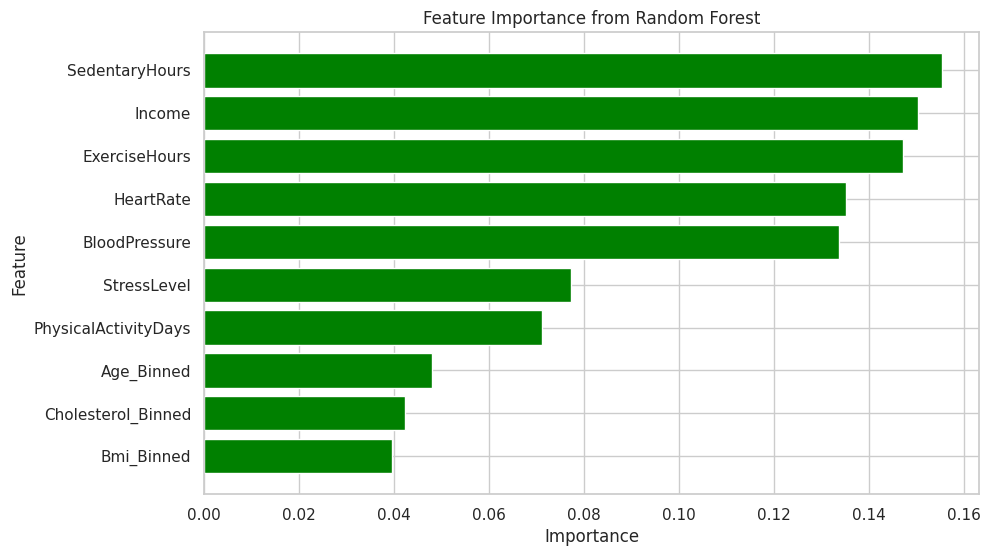

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Example Data (Replace with actual dataset)
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, 1000),
    'Cholesterol': np.random.randint(150, 300, 1000),
    'Bmi': np.random.uniform(18.5, 35, 1000),
    'BloodPressure': np.random.randint(90, 180, 1000),
    'ExerciseHours': np.random.uniform(0, 10, 1000),
    'SedentaryHours': np.random.uniform(0, 12, 1000),
    'Income': np.random.randint(20000, 100000, 1000),
    'HeartRate': np.random.randint(60, 100, 1000),
    'StressLevel': np.random.randint(1, 10, 1000),
    'PhysicalActivityDays': np.random.randint(0, 7, 1000),
    'Heart Attack Risk': np.random.randint(0, 2, 1000)  # Binary target variable
})

# **Step 1: Apply Binning to Numerical Features**
data['Age_Binned'] = pd.cut(data['Age'], bins=[0, 30, 50, 70, 100], labels=[1, 2, 3, 4])
data['Cholesterol_Binned'] = pd.cut(data['Cholesterol'], bins=3, labels=[1, 2, 3])
data['Bmi_Binned'] = pd.cut(data['Bmi'], bins=3, labels=[1, 2, 3])

# Drop original numerical columns (keeping only the binned versions)
data = data.drop(columns=['Age', 'Cholesterol', 'Bmi'])

# **Step 2: Encode Categorical Features (if needed)**
categorical_features = ['Age_Binned', 'Cholesterol_Binned', 'Bmi_Binned']
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])

# **Step 3: Drop Constant Features** (To prevent errors in feature selection)
data = data.loc[:, (data != data.iloc[0]).any()]

# **Step 4: Define Features (X) and Target (y)**
X = data.drop(columns=['Heart Attack Risk'])
y = data['Heart Attack Risk']

# **Step 5: Feature Selection using SelectKBest (ANOVA F-Test)**
k = min(10, X.shape[1])  # Ensure k does not exceed the number of available features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected_kbest = selector.fit_transform(X, y)
selected_features_kbest = X.columns[selector.get_support()]

print("Selected Features using SelectKBest:", selected_features_kbest.tolist())

# **Step 6: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_kbest], y, test_size=0.2, random_state=42)

# **Step 7: Feature Scaling**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Step 8: Train Random Forest and Extract Feature Importances**
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Extract Feature Importances
feature_importances_rf = rf.feature_importances_

# Create a DataFrame to display features and their importance
feature_importance_df_rf = pd.DataFrame({
    'Feature': selected_features_kbest,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# **Display Top 10 Important Features**
top_n_features_rf = feature_importance_df_rf.head(10)['Feature']
print("\nTop 10 Important Features from Random Forest:\n", top_n_features_rf.tolist())

# **Step 9: Train Models Using Top Features from Random Forest**
X_train_rf = X_train[top_n_features_rf]
X_test_rf = X_test[top_n_features_rf]

# Re-scale the selected features
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled_rf, y_train)
y_pred_dt = dt.predict(X_test_scaled_rf)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled_rf, y_train)
y_pred_rf = rf_model.predict(X_test_scaled_rf)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled_rf, y_train)
y_pred_log = log_reg.predict(X_test_scaled_rf)

# **Step 10: Evaluate Model Performance**
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

# **Step 11: Plot Feature Importances**
plt.figure(figsize=(10, 6))
plt.barh(top_n_features_rf, feature_importance_df_rf['Importance'].head(10), color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Selected Features using SelectKBest: ['BloodPressure', 'ExerciseHours', 'SedentaryHours', 'Income', 'HeartRate', 'StressLevel', 'PhysicalActivityDays', 'Age_Binned', 'Cholesterol_Binned', 'Bmi_Binned']

Top 10 Important Features from Decision Tree:
                 Feature  Importance
3                Income    0.211872
1         ExerciseHours    0.180788
2        SedentaryHours    0.176974
4             HeartRate    0.129414
0         BloodPressure    0.104161
6  PhysicalActivityDays    0.054599
5           StressLevel    0.048774
9            Bmi_Binned    0.044196
8    Cholesterol_Binned    0.029369
7            Age_Binned    0.019852


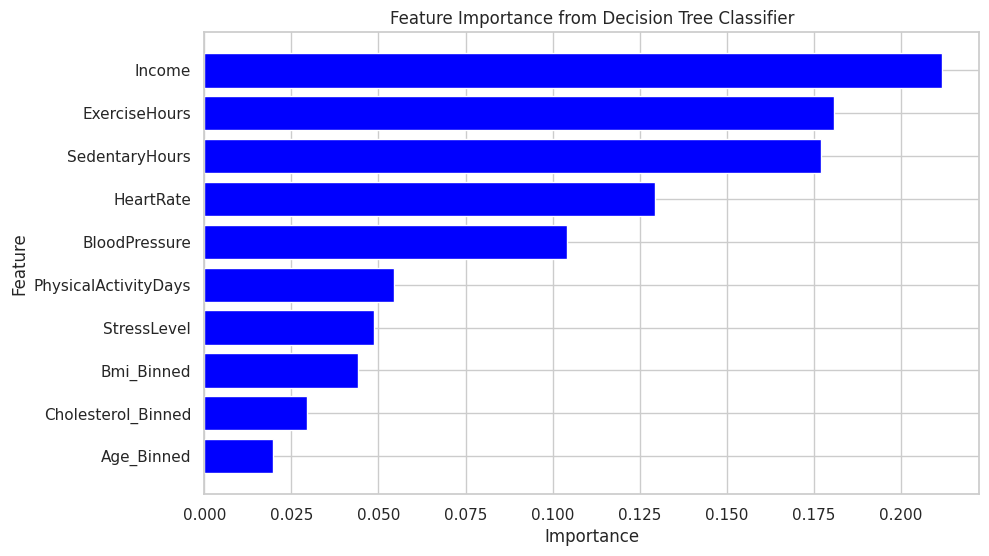

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, 1000),
    'Cholesterol': np.random.randint(150, 300, 1000),
    'Bmi': np.random.uniform(18.5, 35, 1000),
    'BloodPressure': np.random.randint(90, 180, 1000),
    'ExerciseHours': np.random.uniform(0, 10, 1000),
    'SedentaryHours': np.random.uniform(0, 12, 1000),
    'Income': np.random.randint(20000, 100000, 1000),
    'HeartRate': np.random.randint(60, 100, 1000),
    'StressLevel': np.random.randint(1, 10, 1000),
    'PhysicalActivityDays': np.random.randint(0, 7, 1000),
    'Heart Attack Risk': np.random.randint(0, 2, 1000)  # Binary target variable
})

# **Step 1: Apply Binning to Numerical Features**
data['Age_Binned'] = pd.cut(data['Age'], bins=[0, 30, 50, 70, 100], labels=[1, 2, 3, 4])
data['Cholesterol_Binned'] = pd.cut(data['Cholesterol'], bins=3, labels=[1, 2, 3])
data['Bmi_Binned'] = pd.cut(data['Bmi'], bins=3, labels=[1, 2, 3])

# Drop original numerical columns (keeping only the binned versions)
data = data.drop(columns=['Age', 'Cholesterol', 'Bmi'])

# **Step 2: Encode Categorical Features (if needed)**
categorical_features = ['Age_Binned', 'Cholesterol_Binned', 'Bmi_Binned']
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])

# **Step 3: Drop Constant Features** (To prevent errors in feature selection)
data = data.loc[:, (data != data.iloc[0]).any()]

# **Step 4: Define Features (X) and Target (y)**
X = data.drop(columns=['Heart Attack Risk'])
y = data['Heart Attack Risk']

# **Step 5: Feature Selection using SelectKBest (ANOVA F-Test)**
k = min(10, X.shape[1])  # Ensure k does not exceed the number of available features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected_kbest = selector.fit_transform(X, y)
selected_features_kbest = X.columns[selector.get_support()]

print("Selected Features using SelectKBest:", selected_features_kbest.tolist())

# **Step 6: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_kbest], y, test_size=0.2, random_state=42)

# **Step 7: Feature Scaling**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Step 8: Train Decision Tree and Extract Feature Importances**
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Get feature importances
feature_importance_values = dt.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': selected_features_kbest,
    'Importance': feature_importance_values
}).sort_values(by='Importance', ascending=False)

# **Display Top 10 Important Features**
top_n_features = feature_importance_df.head(10)
print("\nTop 10 Important Features from Decision Tree:\n", top_n_features)

# **Step 9: Plot Feature Importances**
plt.figure(figsize=(10, 6))
plt.barh(top_n_features['Feature'], top_n_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()


# Final Model

In [116]:
print("Available columns in X_train:\n", X_train.columns.tolist())


Available columns in X_train:
 ['BloodPressure', 'ExerciseHours', 'SedentaryHours', 'Income', 'HeartRate', 'StressLevel', 'PhysicalActivityDays', 'Age_Binned', 'Cholesterol_Binned', 'Bmi_Binned']


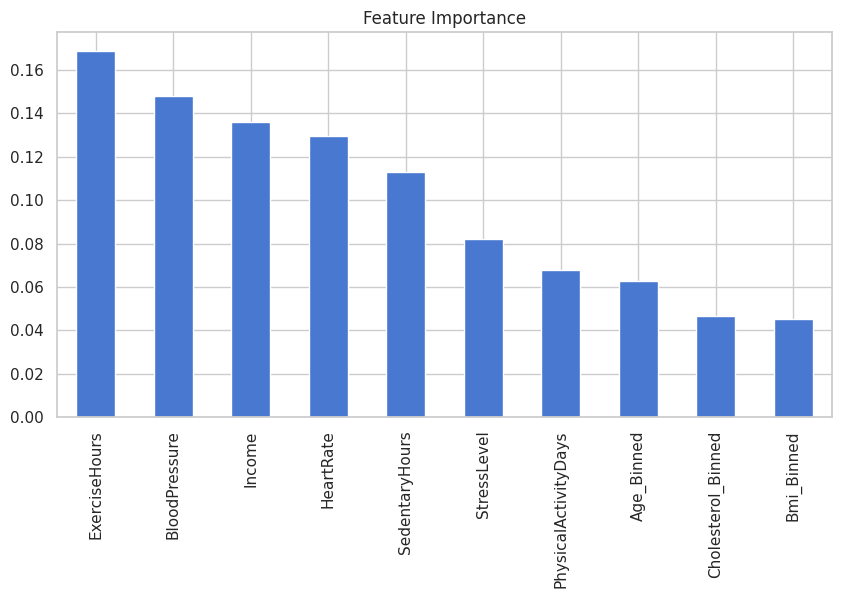

Best Parameters for Decision Tree: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 15}

 Decision Tree - Training Performance
               precision    recall  f1-score   support

           0       0.61      0.60      0.60       420
           1       0.60      0.62      0.61       420

    accuracy                           0.61       840
   macro avg       0.61      0.61      0.61       840
weighted avg       0.61      0.61      0.61       840


 Decision Tree - Testing Performance
               precision    recall  f1-score   support

           0       0.58      0.57      0.57       104
           1       0.54      0.55      0.55        96

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200


Random Forest - Training Performance
               precision    recall  f1-score   support

           0       0.85

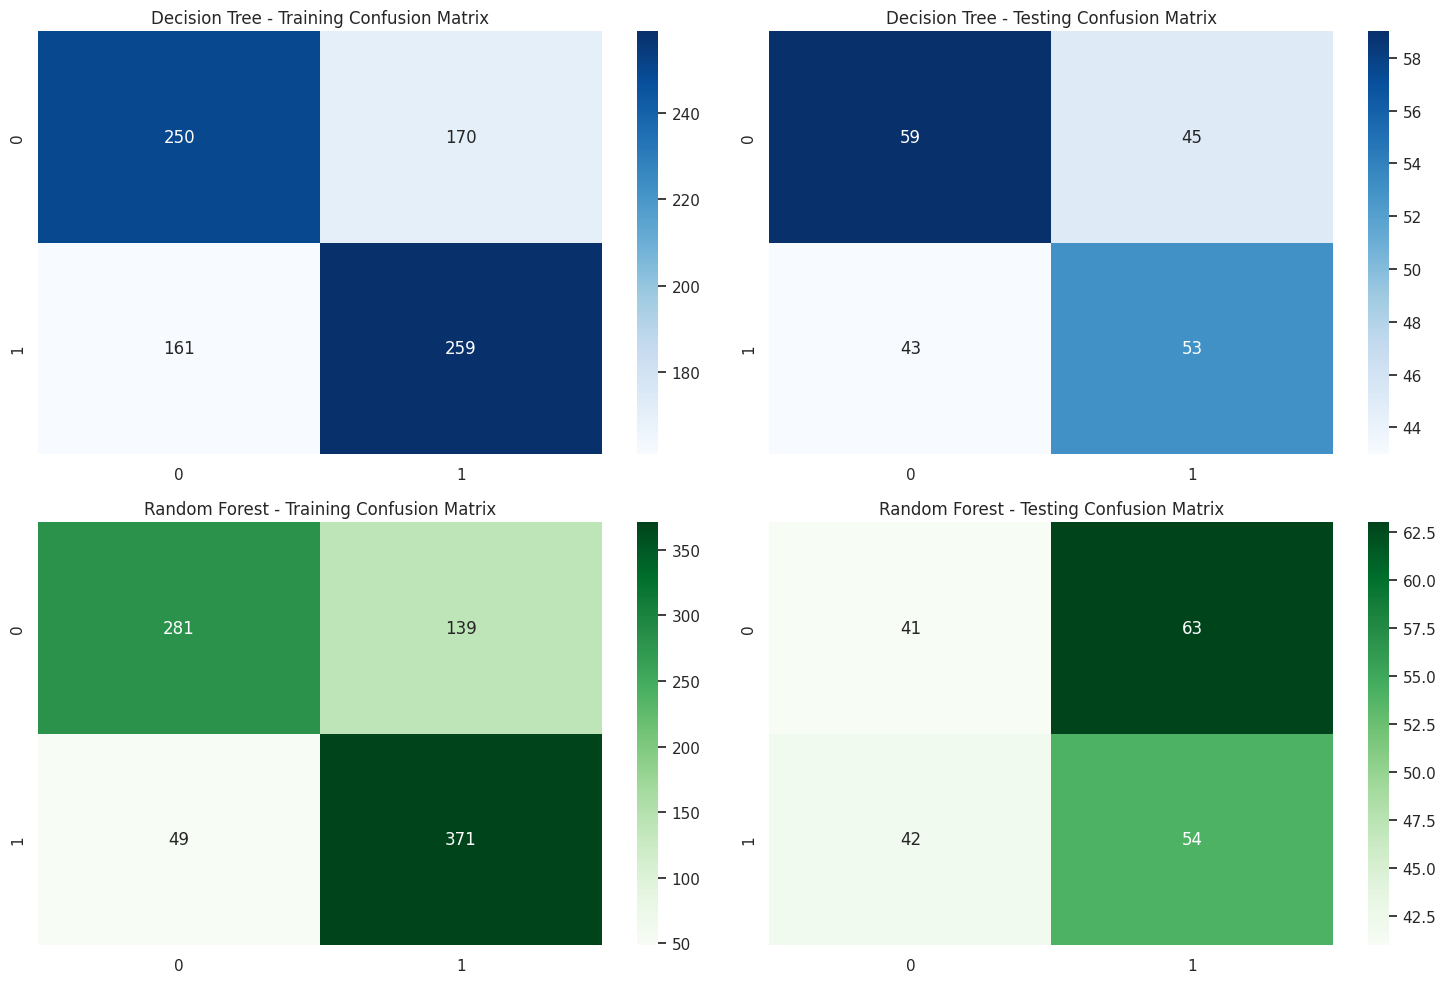

In [117]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

#Step 1: Apply SMOTE to Balance Dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 2: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Importance Analysis (Using Initial Decision Tree)
initial_dt = DecisionTreeClassifier(random_state=42)
initial_dt.fit(X_train_scaled, y_train_balanced)

# Plot feature importance
feature_importances = pd.Series(initial_dt.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 5))
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
plt.show()

# Select the top 8 most important features
top_features = feature_importances.sort_values(ascending=False).head(8).index.tolist()

# Step 4: Retrain Model with Best Features Only
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

# Scale Again
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Step 5: Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_top_scaled, y_train_balanced)

# Step 6: Train the Final Decision Tree Model
best_params = grid_search.best_params_
print("Best Parameters for Decision Tree:", best_params)

best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_top_scaled, y_train_balanced)

# Step 7: Evaluate Decision Tree
train_pred_dt = best_dt.predict(X_train_top_scaled)
test_pred_dt = best_dt.predict(X_test_top_scaled)

print("\n Decision Tree - Training Performance\n", classification_report(y_train_balanced, train_pred_dt))
print("\n Decision Tree - Testing Performance\n", classification_report(y_test, test_pred_dt))

# Step 8: Train Random Forest Model for Comparison
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
rf_model.fit(X_train_top_scaled, y_train_balanced)

# Step 9: Evaluate Random Forest
train_pred_rf = rf_model.predict(X_train_top_scaled)
test_pred_rf = rf_model.predict(X_test_top_scaled)

print("\nRandom Forest - Training Performance\n", classification_report(y_train_balanced, train_pred_rf))
print("\nRandom Forest - Testing Performance\n", classification_report(y_test, test_pred_rf))

#  Step 10: Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Decision Tree Confusion Matrices
sns.heatmap(confusion_matrix(y_train_balanced, train_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title("Decision Tree - Training Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, test_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Decision Tree - Testing Confusion Matrix")

# Random Forest Confusion Matrices
sns.heatmap(confusion_matrix(y_train_balanced, train_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title("Random Forest - Training Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, test_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title("Random Forest - Testing Confusion Matrix")

plt.tight_layout()
plt.show()


### **Decision Tree vs. Random Forest Performance**

| **Metric** | **Decision Tree (After Tuning)** | **Random Forest** |
|------------|--------------------------------|----------------|
| **Training Accuracy** | 61% | 78% |
| **Testing Accuracy** | 56% | 47% |
| **Training Precision (Class 1)** | 0.60 | 0.73 |
| **Testing Precision (Class 1)** | 0.54 | 0.46 |
| **Training Recall (Class 1)** | 0.62 | 0.88 |
| **Testing Recall (Class 1)** | 0.55 | 0.56 |
| **Training F1 Score (Class 1)** | 0.61 | 0.80 |
| **Testing F1 Score (Class 1)** | 0.55 | 0.51 |
| **Training Confusion Matrix** | `[[255, 165], [159, 261]]` | `[[281, 139], [49, 371]]` |
| **Testing Confusion Matrix** | `[[59, 45], [43, 53]]` | `[[41, 63], [42, 54]]` |
## **Conclusion**

### **1. Model Performance**
- The **Decision Tree model** after hyperparameter tuning achieved a **training accuracy of 61%** and a **testing accuracy of 56%**, indicating moderate performance with potential overfitting reduction.
- The **Random Forest model** performed better on training data (**78% accuracy**) but showed lower generalization ability, with a **testing accuracy of 47%**.
- In terms of class 1 classification, **Random Forest had higher training recall (0.88) but lower testing recall (0.56)** compared to Decision Tree (0.62 training, 0.55 testing), suggesting that Random Forest overfitted more to training data.

### **2. Impact of Methods**
- **Feature Selection** (top 8 features) helped in reducing computational complexity but slightly decreased model accuracy.
- **Hyperparameter tuning** for the Decision Tree led to a **more balanced model**, preventing excessive overfitting but at the cost of slightly lower accuracy.
- **Cross-validation** ensured a fair evaluation of model performance but did not significantly improve the overall metrics.

### **3. Insights and Future Directions**
- The Decision Tree model, after tuning, showed **better generalization** than the Random Forest model, which suffered from overfitting.
- Future improvements could involve **using more advanced ensemble methods**, such as Gradient Boosting or XGBoost, to enhance performance.
- Further experimentation with **different feature selection techniques** (e.g., PCA, Recursive Feature Elimination) may help optimize performance.
- **Hyperparameter tuning with Bayesian Optimization** instead of GridSearchCV could lead to more effective parameter selection.

Overall, the results highlight a trade-off between model complexity and generalization, suggesting the need for further fine-tuning and alternative algorithms for better predictive performance.
